# 感知机

$$o=\sigma(<w, x>+b)\quad\sigma(x)=\begin{cases}1&if x >0 \\ -1 & otherwise\end{cases}$$

**感知机是一个二分类的问题**

- 线性回归：输出的是一个值
- Softmax：输出的是多个类

**感知机原型**

```
initialize w = 0 and b = 0
repeat
    if yi[<w, xi> + b] <= 0 then        // 预测错误 假定正确值为1
        w = w + yixi and b = b + yi     // 权重更新
    endif
until all classified correctly
```

**等价于批量大小为1的梯度下降**

$$loss(y, x, w) = max(0, -y<w,x>)$$

> 分类正确的话 $-y<w, x> \quad> 0$ 需要 $max(0)$ 抑制分类正确时的更新

**收敛定理**

- 数据在半径 $r$ 内
- 存在一个余量 $\rho$
    - $y(x^Tw+b)\geq\rho$ 即所有类分类正确
- 则感知机在 $\frac{r^2 + 1}{\rho^2}$ 步后收敛

### 感知机的问题

感知机不能拟合 `XOR` 问题：Eg. 一三象限一类，二四象限一类

## 多层感知机

Eg. x 轴是一个感知机，y轴是一个感知机

||1|2|3|4|
-|-|-|-|-
|类型|1|2|1|2|
|x轴|+|+|-|-|
|y轴|+|-|-|+|

则两个感知机做异或就能完成分类问题

**相当于引入了隐藏层**, 隐藏层大小是超参数

**单个隐藏层，单分类**

- 输入层 $x\in R^n$
- 隐藏层 $W_1\in R^{m\times n},b_1\in R^m$ *一层就需要一个参数*
- 输出层 $w_2\in R^m, b_2\in R$

$$\begin{cases} h=\sigma(W_1x+b_1)\\ o=w_2^Th+b_2\end{cases}$$

$$\begin{cases}o_v = w_{2(1\times m)}^T\cdot W_{1(m\times n)}\cdot x_{(n\times 1)}\\ o_c = b2 + w_{2(1\times m)}\cdot b_{1(m\times 1)}\end{cases}$$

**$\sigma$激活函数**，按元素函数，其余部分与softmax类似

**激活函数**：一定是非线性，否则输出依旧是线性函数，就相当于单层感知机

******

**单个隐藏层，多分类**

$$y_1,y_2,\cdots,y_k = softmax(o_1,o_2,\cdots,o_k)$$

- Softmax : 将 $R$ 上的预测结果，映射到 $[0, 1]$ 的概率上
- 多分类：Softmax + 隐藏层
- 输入层 $x\in R^n$
- 隐藏层 $W_1\in R^{m\times n},b_1\in R^m$ *一层就需要一个参数*
- 输出层 $w_2\in R^{m\times k}, b_2\in R^{k}$ **与单分类的区别就是输出多了k**

$$\begin{cases} h=\sigma(W_1x+b_1)\\ o=w_2^Th+b_2\\ y=softmax(o)\end{cases}$$

******

**多隐藏层**

$$\begin{cases}
h_1=\sigma(W_1x+b_1)\\
h_2=\sigma(W_2h_1+b_2)\\
h_3=\sigma(W_3h_2+b_3)\\
o=W_4h_3+b_4)\\
\end{cases}$$

> 超参数：隐藏层层数，隐藏层大小

## Skill

**输入复杂度大**：

- 单隐藏层：第一层要大
- 多隐藏层：第一层比单隐藏层小一点，第二层比第一层小一点，以此类推

> 前几层可以稍微扩展：$128\rightarrow256\rightarrow128\rightarrow64\rightarrow16$

## 激活函数

非线性化，避免隐藏层层数塌陷，输出层不需要激活

**Sigmoid激活函数**：输出投影到$[0,1]$

$$sigmoid(x)=\frac{1}{1+e^{-x}}$$

**tanh激活函数**：输出投影到$[-1,1]$

$$tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$

**ReLU激活函数**：rectified linear unit

$$ReLU(x)=max(x,0)$$

> 优点：计算很快，不需要指数运算

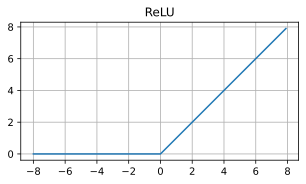

In [13]:
import torch
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

%matplotlib inline

backend_inline.set_matplotlib_formats('svg')
plt.rcParams["figure.figsize"] = (5, 2.5)
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())
plt.title("ReLU")
plt.grid("on")

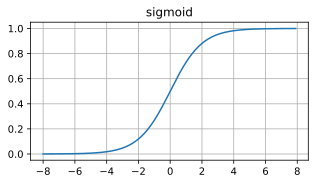

In [14]:
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.title("sigmoid")
plt.grid("on")

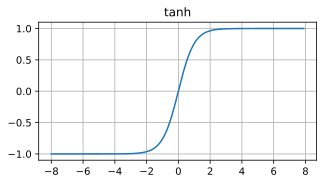

In [15]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.title("tanh")
plt.grid("on")

# 多层感知机从零开始

In [1]:
import time
import torchvision
import os

In [2]:
batch_size = 256

data_path = os.path.join(".", "data")
num_workers = os.cpu_count()
transformer = torchvision.transforms.ToTensor()

train_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=True, download=True, transform=transformer), shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=False, download=True, transform=transformer), shuffle=False, num_workers=num_workers)

In [3]:
""" 单隐藏层的多层感知机 单层为 256 """
num_inputs, num_hiddens, num_outputs = 28 * 28, 256, 10

# W1 784 * 256, b1 1 * 256
W1 = torch.normal(mean=0, std=0.1, size=(num_inputs, num_hiddens), requires_grad=True)
b1 = torch.zeros(size=(1, num_hiddens), requires_grad=True)

# W2 256 * 10, b2 1 * 10
W2 = torch.normal(mean=0, std=0.1, size=(num_hiddens, num_outputs), requires_grad=True)
b2 = torch.zeros(size=(1, num_outputs), requires_grad=True)

params = [W1, b1, W2, b2]

In [4]:
""" ReLU 激活函数 """
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

In [5]:
""" module """
def net(x):
    x = x.reshape((-1, num_inputs))
    h = relu(x @ W1 + b1) # @ = matmul()
    return (h @ W2 + b2)

loss = torch.nn.CrossEntropyLoss(reduction='none')
updater = torch.optim.SGD(params=params, lr=0.1)

In [6]:
# 训练器与 softmax 相同
""" 累加器对象 """
class Accumulator: # 累加器对象
    """ 在 n 个变量上累加 """
    def __init__(self, n):
        self.data = [0.0] * n # python 语法 [0]*n将n个list连接在一起

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
        # zip() 将迭代器打包成元组

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, index):
        return self.data[index]

""" 与真实值对比 """
def accuracy(y_hat, y):
    """ 分类问题，统计正确个数 """
    # y_hat 是二维矩阵，取每一行的最大值
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # 返回最大值对应的序号
    cmp = y_hat.type(y.dtype) == y # 保证 y 和 y_hat 类型相同
    # cmp 是 bool 类型
    return float(cmp.type(y.dtype).sum())

""" 评估 net 的准确性 """
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval() # 如果是 torch 神经网络，则设置为评估模式，不进行反向传播
    accum = Accumulator(2)
    for X, y in data_iter:
        accum.add(accuracy(net(X), y), y.numel())
    return accum[0] / accum[1]

""" 一轮训练 """
def train_epoch_ch3(net, train_iter, loss, params, updater, lr):
    if isinstance(net, torch.nn.Module):
        net.train() # 训练模式，进行反向传播
    metric = Accumulator(3)
    for X, y in train_iter:
        l = loss(net(X), y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(params, lr, len(X)) # 更新器需要 batch_size
        metric.add(float(l.sum()), accuracy(net(X), y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

""" 训练函数 """
def train_ch3(net, train_iter, test_iter, loss, num_epochs, params, updater, lr):
    accumulator = [Accumulator(3) for _ in range(num_epochs)]
    for epoch in range(num_epochs):
        start = time.perf_counter()
        train_metrics = train_epoch_ch3(net, train_iter, loss, params, updater, lr) # 训练误差
        test_accuracy = evaluate_accuracy(net, test_iter) # 测试误差
        accumulator[epoch].add(train_metrics[0], train_metrics[1], test_accuracy)
        end = time.perf_counter()
        print(f"Finish {epoch + 1} train, cose {end-start:.3f} sec")
    return accumulator

In [7]:
""" 训练 """
num_epochs = 5
all_start = time.perf_counter()
accumulator = train_ch3(net, train_iter, test_iter, loss, num_epochs, None, updater, None)
all_end = time.perf_counter()
print(f"\n Totally use {all_end-all_start:.3f} sec")

Finish 1 train, cose 62.407 sec
Finish 2 train, cose 62.190 sec
Finish 3 train, cose 62.162 sec
Finish 4 train, cose 63.674 sec
Finish 5 train, cose 62.857 sec

 Totally use 313.293 sec


Test accuracy : 0.303


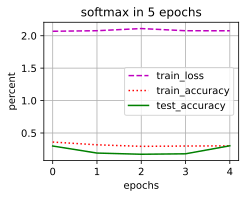

In [8]:
""" 打印图片 """
def show_img(imgs, num_rows, num_cols, title=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    plt.rcParams["figure.figsize"] = figsize
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.title(title[i])
        plt.axis('off')
        if torch.is_tensor(imgs[i].numpy()):
            plt.imshow(imgs[i].numpy())
        else:
            plt.imshow(imgs[i])

""" 绘图 """
backend_inline.set_matplotlib_formats('svg')
plt.rcParams["figure.figsize"] = (3.5, 2.5)

train_loss, train_accuracy, test_accuracy = [], [], []
for i in range(num_epochs):
    train_loss.append(accumulator[i][0])
    train_accuracy.append(accumulator[i][1])
    test_accuracy.append(accumulator[i][2])
    
plt.plot(list(range(num_epochs)), train_loss, 'm--')
plt.plot(list(range(num_epochs)), train_accuracy, 'r:')
plt.plot(list(range(num_epochs)), test_accuracy, 'g-')
plt.legend(["train_loss", "train_accuracy", "test_accuracy"])
plt.xlabel('epochs')
plt.ylabel('percent')
plt.title(f'softmax in {num_epochs} epochs')
plt.grid(True)

print(f"Test accuracy : {test_accuracy[-1]:.3f}")